## Slajdy

https://www.mikulskibartosz.name/rnn

## Repozytorium

https://github.com/mikulskibartosz/RNN_workshop_init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import zscore
import kerastuner as kt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
tf.__version__

'2.5.0-rc1'

In [3]:
keras.__version__

'2.5.0'

In [4]:
kt.__version__

'1.0.2'

In [5]:
import scipy
scipy.__version__

'1.6.2'

In [6]:
pd.__version__

'1.2.4'

In [7]:
np.__version__

'1.19.5'

In [8]:
import matplotlib
matplotlib.__version__

'3.4.1'

In [9]:
r = requests.get('https://raw.githubusercontent.com/mikulskibartosz/RNN_workshop/main/visitors.csv%20-%20Sheet1.csv', allow_redirects=True)
with open('data.csv', 'wb') as f:
  f.write(r.content)
  
data = pd.read_csv('data.csv')

In [10]:
data

,date,visitors
0,1/1/20,262
1,1/2/20,680
2,1/3/20,616
3,1/4/20,352
4,1/5/20,399
...,...,...
441,3/17/21,842
442,3/18/21,914
443,3/19/21,956
444,3/20/21,361


In [11]:
data['date'] = pd.to_datetime(data.date)

data['visitors'] = data['visitors'].str.replace(',', '')
data['visitors'] = data['visitors'].astype(int)

In [12]:
data

,date,visitors
0,2020-01-01,262
1,2020-01-02,680
2,2020-01-03,616
3,2020-01-04,352
4,2020-01-05,399
...,...,...
441,2021-03-17,842
442,2021-03-18,914
443,2021-03-19,956
444,2021-03-20,361


In [13]:
plt.rcParams["figure.figsize"] = (20,10)

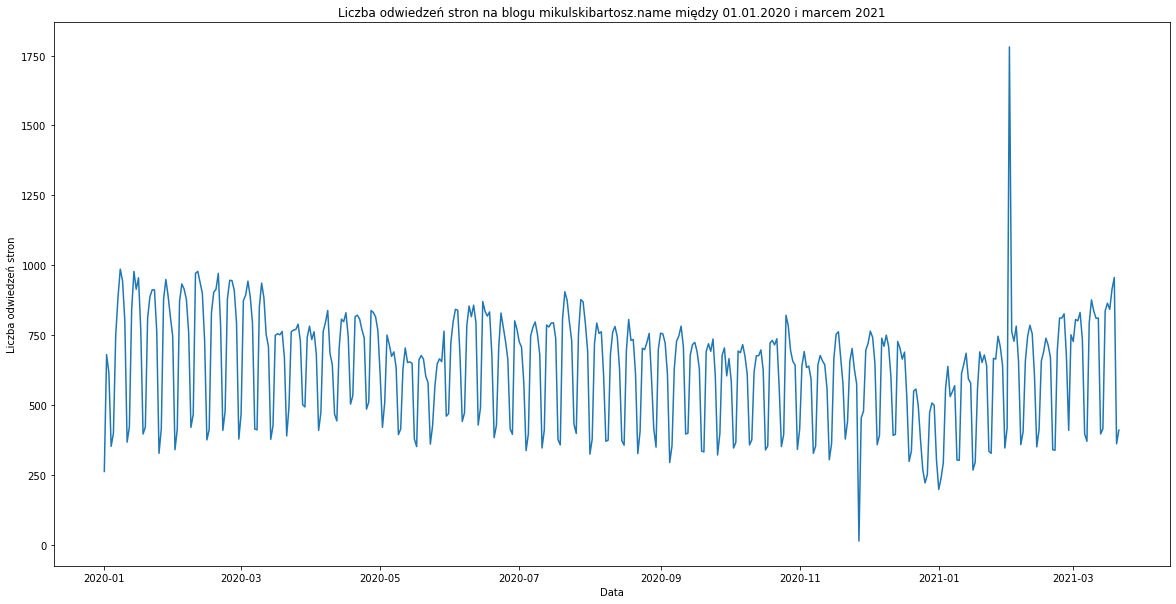

In [14]:
plt.plot(data.date, data.visitors)

plt.xlabel('Data')
plt.ylabel('Liczba odwiedzeń stron')
plt.title('Liczba odwiedzeń stron na blogu mikulskibartosz.name między 01.01.2020 i marcem 2021')
plt.show()

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
visitors,446.0,634.473094,196.327834,13.0,441.0,678.5,768.0,1781.0


<AxesSubplot:>

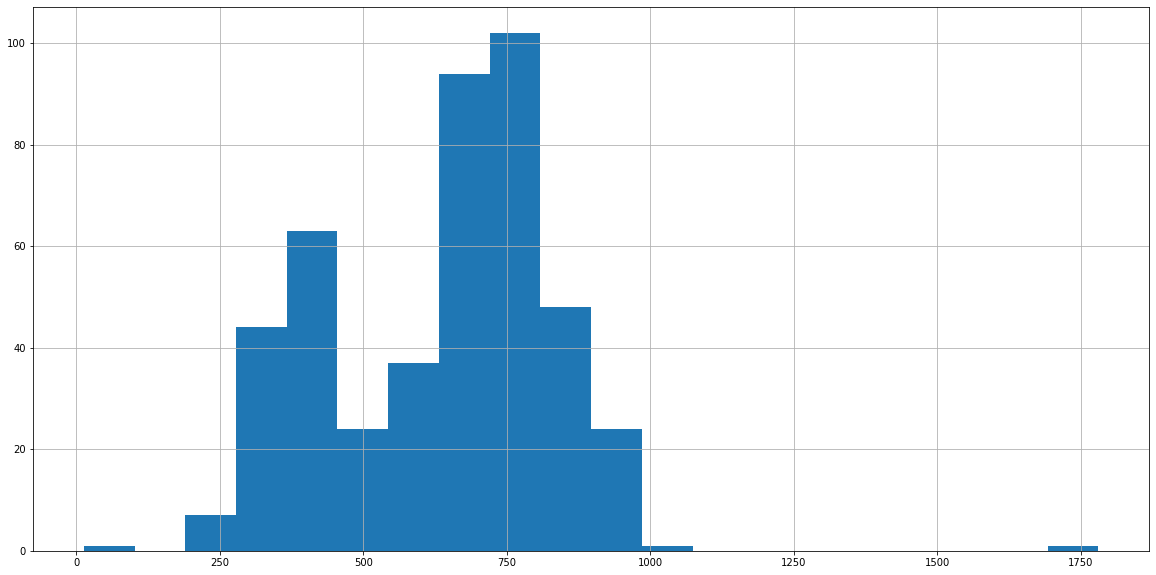

In [16]:
data.visitors.hist(bins=20)

In [17]:
data["visitors_score"] = zscore(data["visitors"])
data["is_outlier"] = data["visitors_score"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
data[data["is_outlier"]]

,date,visitors,visitors_score,is_outlier
331,2020-11-27,13,-3.169041,True
397,2021-02-01,1781,5.846417,True


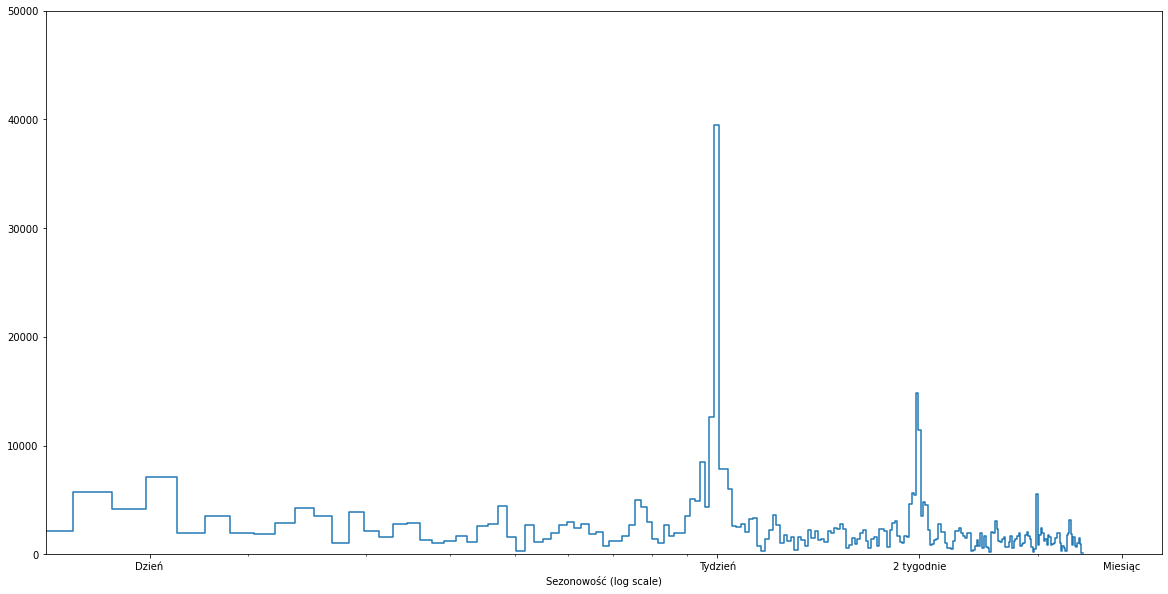

In [18]:
fft = tf.signal.rfft(data['visitors'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(data['visitors'])
weeks_per_dataset = n_samples_h/(7)
f_per_year = f_per_dataset/weeks_per_dataset # sampling frequency

plt.step(f_per_year, np.abs(fft)) # plot(x, y) z kątami prostymi
plt.xscale('log')
plt.ylim(0, 50000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1.0/7, 1, 2, 4], labels=['Dzień', 'Tydzień', '2 tygodnie', 'Miesiąc'])
_ = plt.xlabel('Sezonowość (log scale)')

In [19]:
data.loc[data['visitors'] == 1781, 'visitors']  = (641+763+728) / 3
data.loc[data['visitors'] == 13, 'visitors']  = (628 + 575 + 454 + 478) / 4

In [20]:
data['day_of_week'] = data.date.dt.weekday

In [21]:
data

,date,visitors,visitors_score,is_outlier,day_of_week
0,2020-01-01,262.0,-1.899330,False,2
1,2020-01-02,680.0,0.232153,False,3
2,2020-01-03,616.0,-0.094199,False,4
3,2020-01-04,352.0,-1.440398,False,5
4,2020-01-05,399.0,-1.200734,False,6
...,...,...,...,...,...
441,2021-03-17,842.0,1.058230,False,2
442,2021-03-18,914.0,1.425375,False,3
443,2021-03-19,956.0,1.639543,False,4
444,2021-03-20,361.0,-1.394505,False,5


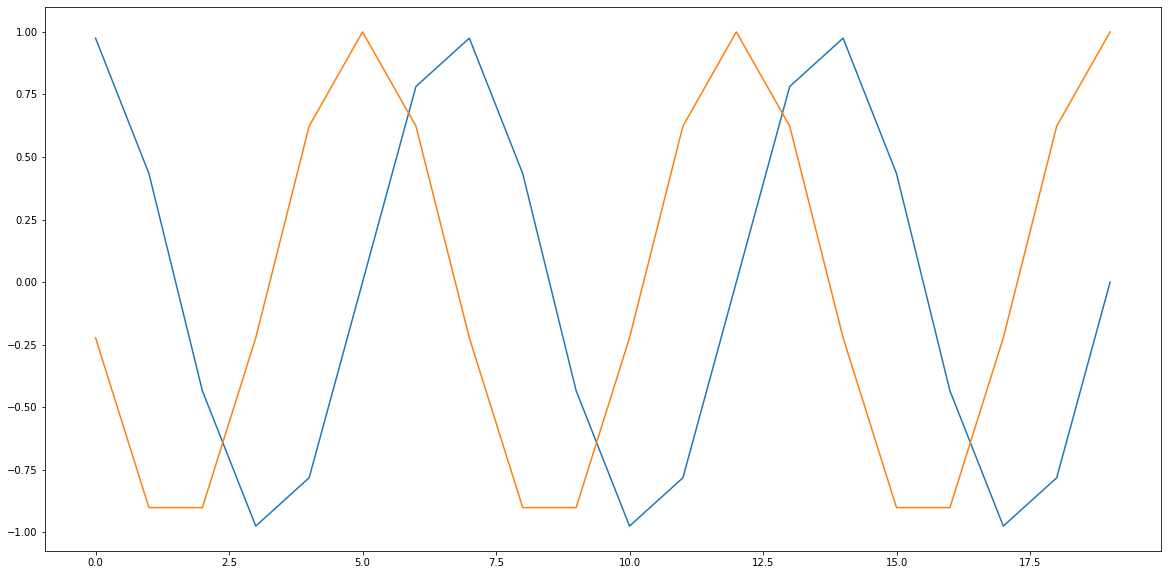

In [22]:
data['day_of_week_sin'] = np.sin(data['day_of_week'] * (2 * np.pi / 7))
data['day_of_week_cos'] = np.cos(data['day_of_week'] * (2 * np.pi / 7))
plt.plot(data['day_of_week_sin'][:20])
plt.plot(data['day_of_week_cos'][:20])

In [23]:
data

,date,visitors,visitors_score,is_outlier,day_of_week,day_of_week_sin,day_of_week_cos
0,2020-01-01,262.0,-1.899330,False,2,0.974928,-0.222521
1,2020-01-02,680.0,0.232153,False,3,0.433884,-0.900969
2,2020-01-03,616.0,-0.094199,False,4,-0.433884,-0.900969
3,2020-01-04,352.0,-1.440398,False,5,-0.974928,-0.222521
4,2020-01-05,399.0,-1.200734,False,6,-0.781831,0.623490
...,...,...,...,...,...,...,...
441,2021-03-17,842.0,1.058230,False,2,0.974928,-0.222521
442,2021-03-18,914.0,1.425375,False,3,0.433884,-0.900969
443,2021-03-19,956.0,1.639543,False,4,-0.433884,-0.900969
444,2021-03-20,361.0,-1.394505,False,5,-0.974928,-0.222521


In [24]:
data['is_weekend'] = data['day_of_week'].isin([5, 6])

In [25]:
data['day_of_month'] = data.date.dt.day
data['day_of_month_sin'] = np.sin(data['day_of_month'] * (2 * np.pi / 30))
data['day_of_month_cos'] = np.cos(data['day_of_month'] * (2 * np.pi / 30))

In [26]:
features = data[[
  'visitors',
  'day_of_week_sin',
  'day_of_week_cos',
  'day_of_month_sin',
  'day_of_month_cos',
  'is_weekend'
]]

In [27]:
n = len(features)

train_df = features[0:int(n*0.7)]
val_df = features[int(n*0.7):int(n*0.9)]
test_df = features[int(n*0.9):]

num_features = features.shape[1]

In [28]:
test_df.shape

(45, 6)

In [29]:
train_df

,visitors,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,is_weekend
0,262.0,0.974928,-0.222521,0.207912,0.978148,False
1,680.0,0.433884,-0.900969,0.406737,0.913545,False
2,616.0,-0.433884,-0.900969,0.587785,0.809017,False
3,352.0,-0.974928,-0.222521,0.743145,0.669131,True
4,399.0,-0.781831,0.623490,0.866025,0.500000,True
...,...,...,...,...,...,...
307,691.0,0.781831,0.623490,0.587785,0.809017,False
308,634.0,0.974928,-0.222521,0.743145,0.669131,False
309,639.0,0.433884,-0.900969,0.866025,0.500000,False
310,593.0,-0.433884,-0.900969,0.951057,0.309017,False


In [30]:
train_mean = train_df.mean() # TRAIN!
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [31]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result


  def plot(self, model=None, plot_col='visitors', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Days')

In [32]:
INPUT_WIDTH = 7

In [33]:
window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=INPUT_WIDTH,
    shift=1,
    label_columns=['visitors']
)

In [34]:
window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['visitors']

In [35]:
baseline = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [36]:
import os
import datetime

def compile(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience, mode='min')
    
    logdir = os.path.join('logs2', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    tensorflow_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
    model.compile(loss=tf.losses.MeanSquaredError(),
                 optimizer=tf.optimizers.Adam(),
                 metrics=[tf.metrics.MeanAbsoluteError()])
    
    return model.fit(
        window.train,
        epochs=20,
        validation_data=window.val,
        callbacks=[early_stopping, tensorflow_callback]
    )

In [37]:
%load_ext tensorboard

In [38]:
compile(baseline, window)

Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['visitors']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpumwpg6e3.py, line 10)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['visitors']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpumwpg6e3.py, line 10)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/20
10/10 [==============================] - 1s 52ms/step - loss: 3.8627 - mean_absolute_error: 1.6320 - val_loss: 3.4650 - val_mean_absolute_error

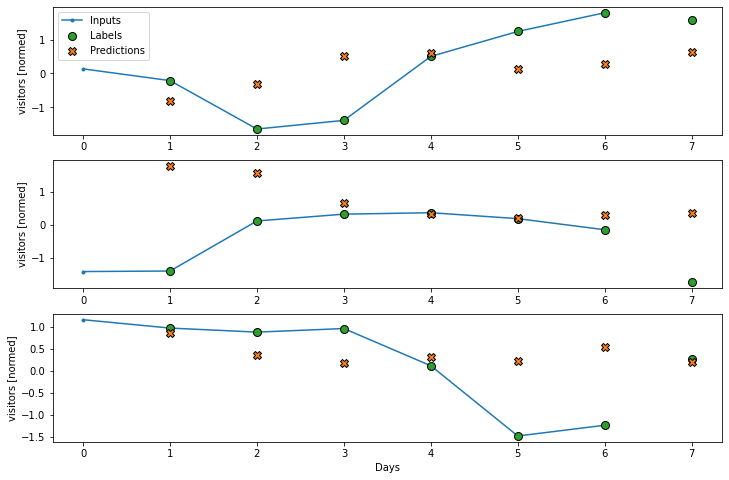

In [39]:
window.plot(baseline)

In [40]:
%tensorboard --logdir logs2

In [41]:
baseline.predict(window.test)[0][0] * train_std + train_mean

visitors            725.343149
day_of_week_sin       0.271042
day_of_week_cos       0.263344
day_of_month_sin      0.288212
day_of_month_cos      0.301626
is_weekend            0.458181
dtype: float64

## Dense model

In [42]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [43]:
compile(dense, window)

Epoch 1/20
10/10 [==============================] - 2s 75ms/step - loss: 0.8842 - mean_absolute_error: 0.7878 - val_loss: 0.7758 - val_mean_absolute_error: 0.6763
Epoch 2/20
10/10 [==============================] - 0s 13ms/step - loss: 0.4993 - mean_absolute_error: 0.5787 - val_loss: 0.6107 - val_mean_absolute_error: 0.6356
Epoch 3/20
10/10 [==============================] - 0s 15ms/step - loss: 0.3161 - mean_absolute_error: 0.4640 - val_loss: 0.5033 - val_mean_absolute_error: 0.5783
Epoch 4/20
10/10 [==============================] - 0s 15ms/step - loss: 0.2302 - mean_absolute_error: 0.3953 - val_loss: 0.3791 - val_mean_absolute_error: 0.4971
Epoch 5/20
10/10 [==============================] - 0s 15ms/step - loss: 0.1651 - mean_absolute_error: 0.3327 - val_loss: 0.3010 - val_mean_absolute_error: 0.4306
Epoch 6/20
10/10 [==============================] - 0s 18ms/step - loss: 0.1208 - mean_absolute_error: 0.2770 - val_loss: 0.2511 - val_mean_absolute_error: 0.3886
Epoch 7/20
10/10 [====

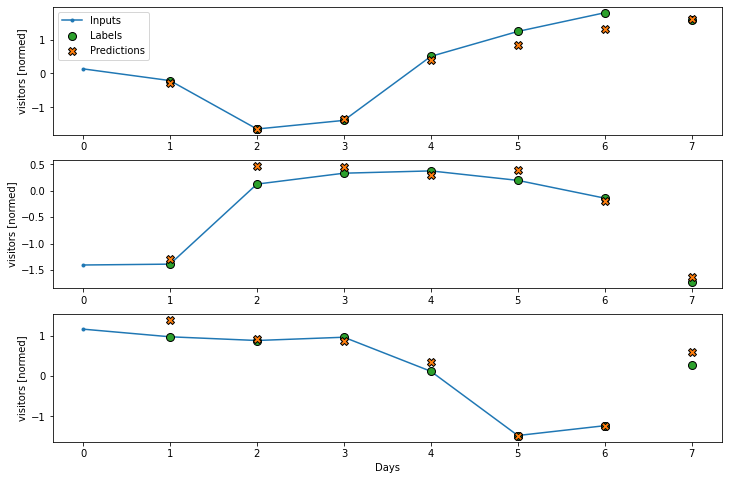

In [44]:
window.plot(dense)

In [45]:
?tf.keras.layers.LSTM



In [46]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        512,
        return_sequences=True,
        activation="tanh",
        activity_regularizer=tf.keras.regularizers.L2(0.01)
    ),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

In [47]:
compile(lstm, window)

Epoch 1/20
10/10 [==============================] - 5s 185ms/step - loss: 0.8140 - mean_absolute_error: 0.7246 - val_loss: 0.5338 - val_mean_absolute_error: 0.5445
Epoch 2/20
10/10 [==============================] - 1s 51ms/step - loss: 0.2865 - mean_absolute_error: 0.3889 - val_loss: 0.3474 - val_mean_absolute_error: 0.4170
Epoch 3/20
10/10 [==============================] - 1s 50ms/step - loss: 0.1779 - mean_absolute_error: 0.3014 - val_loss: 0.3449 - val_mean_absolute_error: 0.4111
Epoch 4/20
10/10 [==============================] - 0s 48ms/step - loss: 0.1289 - mean_absolute_error: 0.2531 - val_loss: 0.2779 - val_mean_absolute_error: 0.3524
Epoch 5/20
10/10 [==============================] - 1s 51ms/step - loss: 0.1094 - mean_absolute_error: 0.2315 - val_loss: 0.2925 - val_mean_absolute_error: 0.3628
Epoch 6/20
10/10 [==============================] - 1s 52ms/step - loss: 0.1005 - mean_absolute_error: 0.2255 - val_loss: 0.2888 - val_mean_absolute_error: 0.3603
Epoch 7/20
10/10 [===

In [48]:
%tensorboard --logdir logs

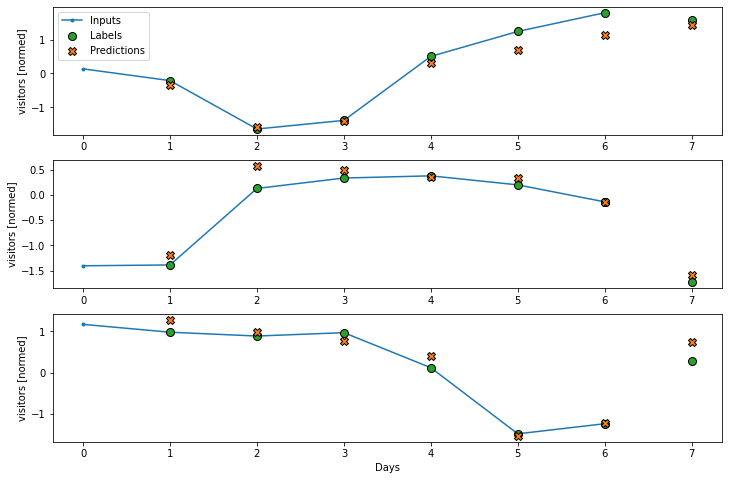

In [49]:
window.plot(lstm)

In [50]:
tf.__version__

'2.5.0-rc1'

In [51]:
OUT_STEPS = 7

week_window = WindowGenerator(
    input_width=7,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=['visitors']
)

In [52]:
week_window

Total window size: 14
Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): ['visitors']

In [53]:
dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(OUT_STEPS * num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [54]:
compile(dense_model, week_window)

Epoch 1/20
10/10 [==============================] - 1s 59ms/step - loss: 1.3026 - mean_absolute_error: 0.9501 - val_loss: 1.6009 - val_mean_absolute_error: 0.9812
Epoch 2/20
10/10 [==============================] - 0s 24ms/step - loss: 1.2243 - mean_absolute_error: 0.9206 - val_loss: 1.5647 - val_mean_absolute_error: 0.9690
Epoch 3/20
10/10 [==============================] - 0s 25ms/step - loss: 1.2218 - mean_absolute_error: 0.9203 - val_loss: 1.5293 - val_mean_absolute_error: 0.9571
Epoch 4/20
10/10 [==============================] - 0s 16ms/step - loss: 1.2030 - mean_absolute_error: 0.9145 - val_loss: 1.4961 - val_mean_absolute_error: 0.9460
Epoch 5/20
10/10 [==============================] - 0s 18ms/step - loss: 1.1589 - mean_absolute_error: 0.9011 - val_loss: 1.4644 - val_mean_absolute_error: 0.9351
Epoch 6/20
10/10 [==============================] - 0s 22ms/step - loss: 1.1050 - mean_absolute_error: 0.8757 - val_loss: 1.4339 - val_mean_absolute_error: 0.9247
Epoch 7/20
10/10 [====

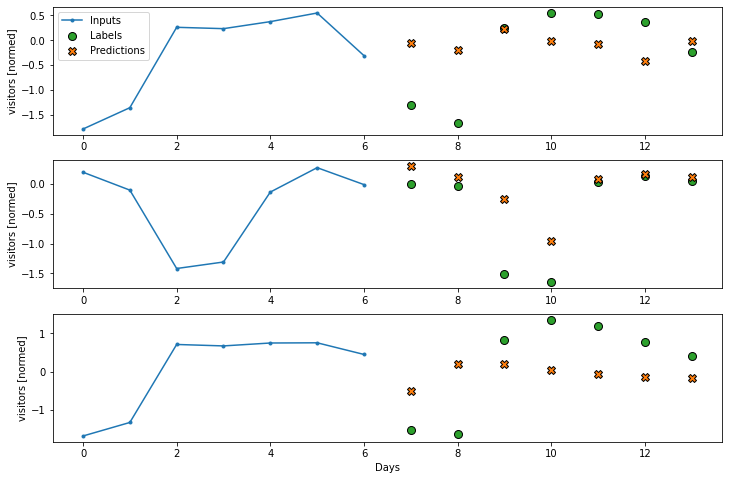

In [55]:
week_window.plot(dense_model)

In [56]:
import os
import datetime

def compile(model, window, epochs=20, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience, mode='min')
    
    logdir = os.path.join('logs2', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    tensorflow_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
    model.compile(loss=tf.losses.MeanSquaredError(),
                 optimizer=tf.optimizers.Adam(),
                 metrics=[tf.metrics.MeanAbsoluteError()])
    
    return model.fit(
        window.train,
        epochs=epochs,
        validation_data=window.val,
        callbacks=[early_stopping, tensorflow_callback]
    )

In [57]:
large_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS * num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [58]:
compile(large_dense_model, week_window, epochs=40)

Epoch 1/40
10/10 [==============================] - 1s 34ms/step - loss: 0.9255 - mean_absolute_error: 0.8094 - val_loss: 1.0845 - val_mean_absolute_error: 0.7905
Epoch 2/40
10/10 [==============================] - 0s 12ms/step - loss: 0.7237 - mean_absolute_error: 0.7070 - val_loss: 0.9897 - val_mean_absolute_error: 0.7608
Epoch 3/40
10/10 [==============================] - 0s 18ms/step - loss: 0.5715 - mean_absolute_error: 0.6262 - val_loss: 0.9192 - val_mean_absolute_error: 0.7448
Epoch 4/40
10/10 [==============================] - 0s 29ms/step - loss: 0.4424 - mean_absolute_error: 0.5434 - val_loss: 0.8512 - val_mean_absolute_error: 0.7253
Epoch 5/40
10/10 [==============================] - 0s 18ms/step - loss: 0.3802 - mean_absolute_error: 0.5059 - val_loss: 0.7889 - val_mean_absolute_error: 0.7008
Epoch 6/40
10/10 [==============================] - 0s 18ms/step - loss: 0.3216 - mean_absolute_error: 0.4635 - val_loss: 0.7556 - val_mean_absolute_error: 0.6881
Epoch 7/40
10/10 [====

In [59]:
%tensorboard --logdir logs2

Reusing TensorBoard on port 6006 (pid 33949), started 0:00:52 ago. (Use '!kill 33949' to kill it.)

In [60]:
# val_loss: 0.3453

In [61]:
large_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(
        256,
        activation='relu',
        activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(
        128,
        activation='relu',
        activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(OUT_STEPS * num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [62]:
compile(large_dense_model, week_window, epochs=40)

Epoch 1/40
10/10 [==============================] - 1s 51ms/step - loss: 1.0330 - mean_absolute_error: 0.8239 - val_loss: 1.1405 - val_mean_absolute_error: 0.7773
Epoch 2/40
10/10 [==============================] - 0s 18ms/step - loss: 0.8037 - mean_absolute_error: 0.7016 - val_loss: 1.0313 - val_mean_absolute_error: 0.7333
Epoch 3/40
10/10 [==============================] - 0s 25ms/step - loss: 0.6168 - mean_absolute_error: 0.5764 - val_loss: 0.9681 - val_mean_absolute_error: 0.7086
Epoch 4/40
10/10 [==============================] - 0s 22ms/step - loss: 0.5069 - mean_absolute_error: 0.4881 - val_loss: 0.8994 - val_mean_absolute_error: 0.6833
Epoch 5/40
10/10 [==============================] - 0s 13ms/step - loss: 0.4417 - mean_absolute_error: 0.4435 - val_loss: 0.8264 - val_mean_absolute_error: 0.6520
Epoch 6/40
10/10 [==============================] - 0s 12ms/step - loss: 0.3808 - mean_absolute_error: 0.4045 - val_loss: 0.7992 - val_mean_absolute_error: 0.6450
Epoch 7/40
10/10 [====

In [63]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS * num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [64]:
compile(lstm_model, week_window, epochs=40)

Epoch 1/40
10/10 [==============================] - 4s 143ms/step - loss: 0.9737 - mean_absolute_error: 0.8299 - val_loss: 1.1733 - val_mean_absolute_error: 0.8205
Epoch 2/40
10/10 [==============================] - 0s 19ms/step - loss: 0.8945 - mean_absolute_error: 0.7918 - val_loss: 1.1260 - val_mean_absolute_error: 0.8016
Epoch 3/40
10/10 [==============================] - 0s 17ms/step - loss: 0.8442 - mean_absolute_error: 0.7731 - val_loss: 1.0672 - val_mean_absolute_error: 0.7789
Epoch 4/40
10/10 [==============================] - 0s 17ms/step - loss: 0.7656 - mean_absolute_error: 0.7325 - val_loss: 0.9883 - val_mean_absolute_error: 0.7496
Epoch 5/40
10/10 [==============================] - 0s 18ms/step - loss: 0.6510 - mean_absolute_error: 0.6692 - val_loss: 0.8973 - val_mean_absolute_error: 0.7241
Epoch 6/40
10/10 [==============================] - 0s 21ms/step - loss: 0.4786 - mean_absolute_error: 0.5675 - val_loss: 0.8393 - val_mean_absolute_error: 0.7227
Epoch 7/40
10/10 [===

In [65]:
%tensorboard --logdir logs2

Reusing TensorBoard on port 6006 (pid 33949), started 0:01:21 ago. (Use '!kill 33949' to kill it.)

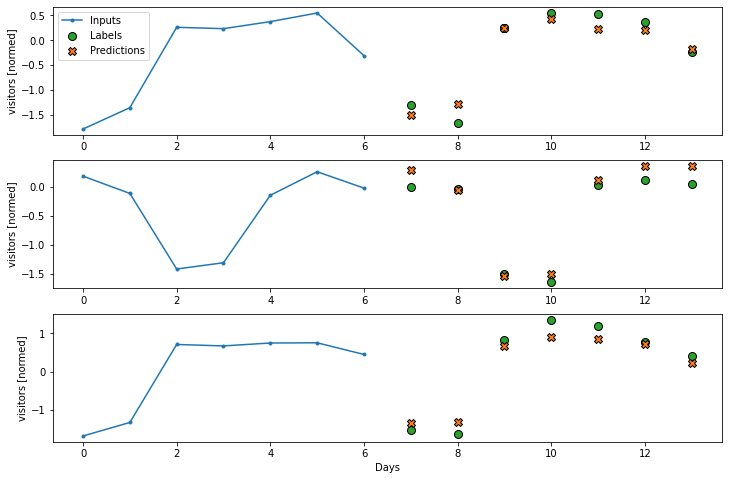

In [66]:
week_window.plot(lstm_model)

In [67]:
lstm_model_2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.LSTM(256, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS * num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [68]:
compile(lstm_model_2, week_window, epochs=40)

Epoch 1/40
10/10 [==============================] - 9s 326ms/step - loss: 0.9315 - mean_absolute_error: 0.8159 - val_loss: 0.9095 - val_mean_absolute_error: 0.7267
Epoch 2/40
10/10 [==============================] - 1s 49ms/step - loss: 0.5010 - mean_absolute_error: 0.5828 - val_loss: 0.7131 - val_mean_absolute_error: 0.6658
Epoch 3/40
10/10 [==============================] - 0s 48ms/step - loss: 0.2628 - mean_absolute_error: 0.4056 - val_loss: 0.5166 - val_mean_absolute_error: 0.5411
Epoch 4/40
10/10 [==============================] - 1s 52ms/step - loss: 0.1577 - mean_absolute_error: 0.3205 - val_loss: 0.4286 - val_mean_absolute_error: 0.4728
Epoch 5/40
10/10 [==============================] - 1s 51ms/step - loss: 0.1330 - mean_absolute_error: 0.2836 - val_loss: 0.3999 - val_mean_absolute_error: 0.4534
Epoch 6/40
10/10 [==============================] - 1s 56ms/step - loss: 0.1117 - mean_absolute_error: 0.2648 - val_loss: 0.3775 - val_mean_absolute_error: 0.4356
Epoch 7/40
10/10 [===

In [69]:
%tensorboard --logdir logs2

Reusing TensorBoard on port 6006 (pid 33949), started 0:01:45 ago. (Use '!kill 33949' to kill it.)

In [70]:
lstm_model_2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(256, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(OUT_STEPS * num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

In [71]:
compile(lstm_model_2, week_window, epochs=40)

Epoch 1/40
10/10 [==============================] - 9s 211ms/step - loss: 0.9409 - mean_absolute_error: 0.8084 - val_loss: 0.8978 - val_mean_absolute_error: 0.7214
Epoch 2/40
10/10 [==============================] - 0s 41ms/step - loss: 0.5530 - mean_absolute_error: 0.6134 - val_loss: 0.7180 - val_mean_absolute_error: 0.6681
Epoch 3/40
10/10 [==============================] - 0s 46ms/step - loss: 0.2799 - mean_absolute_error: 0.4240 - val_loss: 0.5071 - val_mean_absolute_error: 0.5380
Epoch 4/40
10/10 [==============================] - 0s 45ms/step - loss: 0.2079 - mean_absolute_error: 0.3660 - val_loss: 0.4272 - val_mean_absolute_error: 0.4758
Epoch 5/40
10/10 [==============================] - 0s 43ms/step - loss: 0.1625 - mean_absolute_error: 0.3185 - val_loss: 0.3514 - val_mean_absolute_error: 0.4273
Epoch 6/40
10/10 [==============================] - 0s 39ms/step - loss: 0.1380 - mean_absolute_error: 0.2943 - val_loss: 0.3675 - val_mean_absolute_error: 0.4328
Epoch 7/40
10/10 [===

In [72]:
%tensorboard --logdir logs2

Reusing TensorBoard on port 6006 (pid 33949), started 0:02:07 ago. (Use '!kill 33949' to kill it.)

In [73]:
week_window

Total window size: 14
Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): ['visitors']

In [74]:
train_std['visitors']

184.15728326569243

In [75]:
baseline.predict(window.test)[0][0] * train_std + train_mean

visitors            466.595948
day_of_week_sin      -0.724948
day_of_week_cos      -0.730824
day_of_month_sin     -0.700152
day_of_month_cos     -0.698957
is_weekend           -0.177262
dtype: float64

In [76]:
class WindowGenerator2():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result


  def plot(self, model=None, plot_col='visitors', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col}')
      plt.plot(self.input_indices, (inputs[n, :, plot_col_index].numpy() * train_std['visitors'] + train_mean['visitors']),
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index] * train_std['visitors'] + train_mean['visitors'],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs) * train_std + train_mean
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Days')

In [77]:
week_window = WindowGenerator2(
    input_width=7,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=['visitors']
)

Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): ['visitors']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpb9enf2o7.py, line 10)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): ['visitors']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpb9enf2o7.py, line 10)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


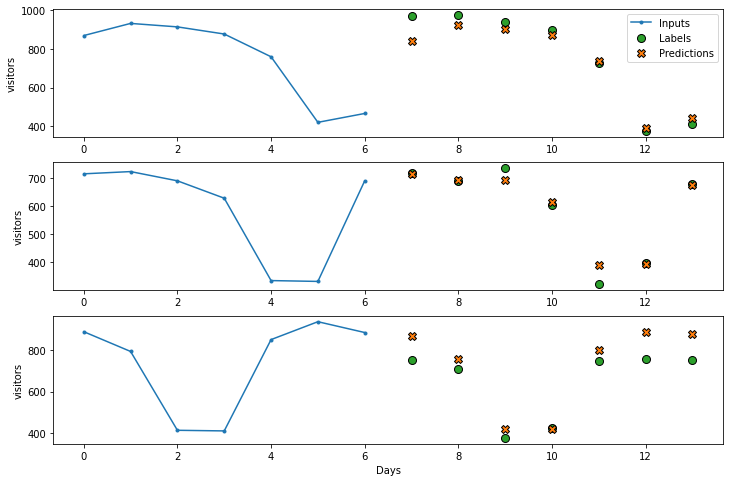

In [78]:
week_window.plot(lstm_model)

In [79]:
def build_model(hp):
    model = tf.keras.Sequential()
    
    number_of_layers = hp.Int('layers', 1, 2)
    for i in range(number_of_layers):
        number_of_units = hp.Int('lstm_units_' + str(i), min_value=32, max_value=512, step=8)
        dropout = hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.6, step=0.1)
        activation_function = hp.Choice('activate_' + str(i), ['relu', 'tanh'])
        
        model.add(
            tf.keras.layers.LSTM(number_of_units, return_sequences=True, activation=activation_function)
        )
        model.add(
            tf.keras.layers.Dropout(dropout)
        )

    number_of_units = hp.Int('lstm_units_last', min_value=32, max_value=512, step=8)
    dropout = hp.Float('dropout_last', min_value=0.0, max_value=0.6, step=0.1)

    model.add(
        tf.keras.layers.LSTM(number_of_units, return_sequences=False)
    )
    model.add(
        tf.keras.layers.Dropout(dropout)
    )

        
    model.add(
        tf.keras.layers.Dense(OUT_STEPS * num_features)
    )
    model.add(
        tf.keras.layers.Reshape([OUT_STEPS, num_features])
    )
    
    model.compile(
        loss=tf.losses.MeanSquaredError(),
        optimizer=tf.optimizers.Adam(),
        metrics=[tf.metrics.MeanAbsoluteError()]
    )
    
    return model

In [80]:
window = WindowGenerator(
    input_width=7,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=['visitors']
)

In [81]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=2,
    directory='hyperband_output',
    project_name='RNN_LSTM_6'
)

In [82]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [83]:
tuner.search(window.train, validation_data=window.val, epochs=10, callbacks=[early_stopping])

Trial 46 Complete [00h 00m 20s]
val_loss: 0.3854675590991974

Best val_loss So Far: 0.34778475761413574
Total elapsed time: 00h 07m 20s
INFO:tensorflow:Oracle triggered exit


In [84]:
models = tuner.get_best_models(num_models=2)

In [85]:
models[0].predict(window.test)[0][0] * train_std + train_mean

visitors            658.894714
day_of_week_sin      -0.120714
day_of_week_cos       0.016962
day_of_month_sin      0.007611
day_of_month_cos     -0.155896
is_weekend            0.234762
dtype: float64

In [86]:
tuner.results_summary()

Results summary
Results in hyperband_output/RNN_LSTM_6
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
layers: 1
lstm_units_0: 504
dropout_0: 0.0
activate_0: relu
lstm_units_last: 280
dropout_last: 0.2
lstm_units_1: 232
dropout_1: 0.6000000000000001
activate_1: relu
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.34778475761413574
Trial summary
Hyperparameters:
layers: 1
lstm_units_0: 464
dropout_0: 0.2
activate_0: tanh
lstm_units_last: 448
dropout_last: 0.4
lstm_units_1: 40
dropout_1: 0.5
activate_1: tanh
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.35391396284103394
Trial summary
Hyperparameters:
layers: 1
lstm_units_0: 160
dropout_0: 0.6000000000000001
activate_0: tanh
lstm_units_last: 472
dropout_last: 0.1
lstm_units_1: 344
dropout_1: 0.2
activate_1: relu
tuner/epochs: 10
tuner/initial_epoch: 5
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 18b6c34541443fa843d0bfbe

In [87]:
prediction = models[0].predict(window.test)[0][0] * train_std + train_mean

In [88]:
prediction['visitors']

719.6943560794099

In [89]:
max_predicted = prediction['visitors'] + train_std
min_predicted = prediction['visitors'] - train_std

In [90]:
max_predicted, min_predicted

(visitors            903.851639
 day_of_week_sin     720.403228
 day_of_week_cos     720.401932
 day_of_month_sin    720.397801
 day_of_month_cos    720.406497
 is_weekend          720.146618
 dtype: float64,
 visitors            535.537073
 day_of_week_sin     718.985484
 day_of_week_cos     718.986780
 day_of_month_sin    718.990911
 day_of_month_cos    718.982215
 is_weekend          719.242094
 dtype: float64)

In [91]:
models[0].save('the_model')

INFO:tensorflow:Assets written to: the_model/assets


INFO:tensorflow:Assets written to: the_model/assets


In [92]:
loaded_model = keras.models.load_model('the_model')

In [93]:
loaded_model.predict(window.test)[0][0] * train_std + train_mean

visitors            823.949417
day_of_week_sin       0.596844
day_of_week_cos       0.617469
day_of_month_sin      0.621176
day_of_month_cos      0.649696
is_weekend            0.655986
dtype: float64

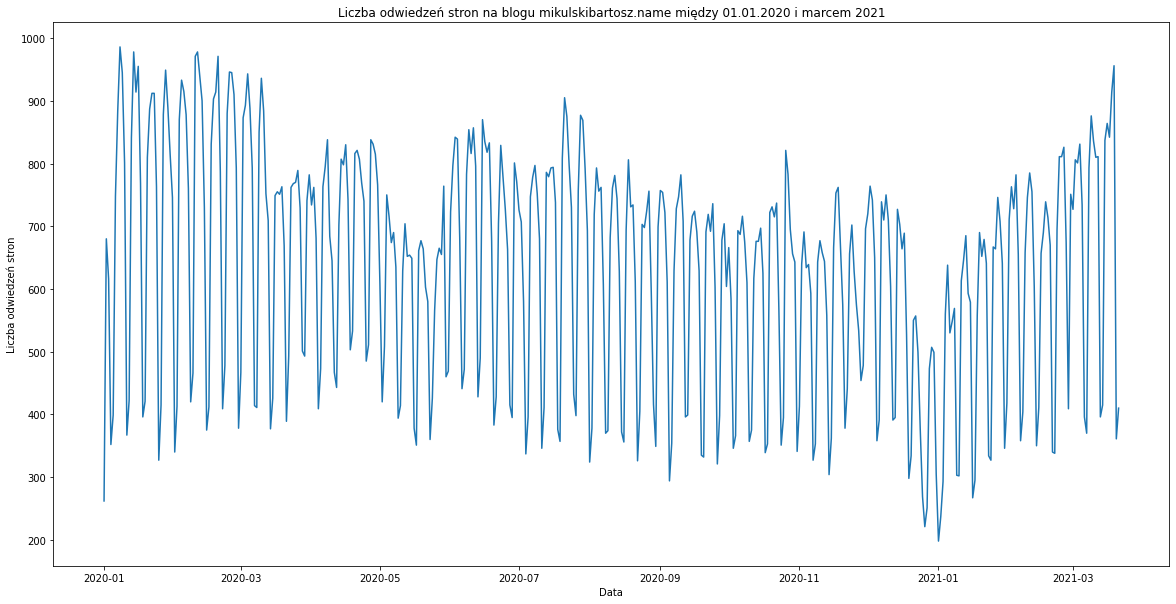

In [94]:
plt.plot(data.date, data.visitors)

plt.xlabel('Data')
plt.ylabel('Liczba odwiedzeń stron')
plt.title('Liczba odwiedzeń stron na blogu mikulskibartosz.name między 01.01.2020 i marcem 2021')
plt.show()

In [95]:
from scipy.signal import savgol_filter

smoothed_2dg = savgol_filter(data['visitors'], window_length = 5, polyorder = 3)

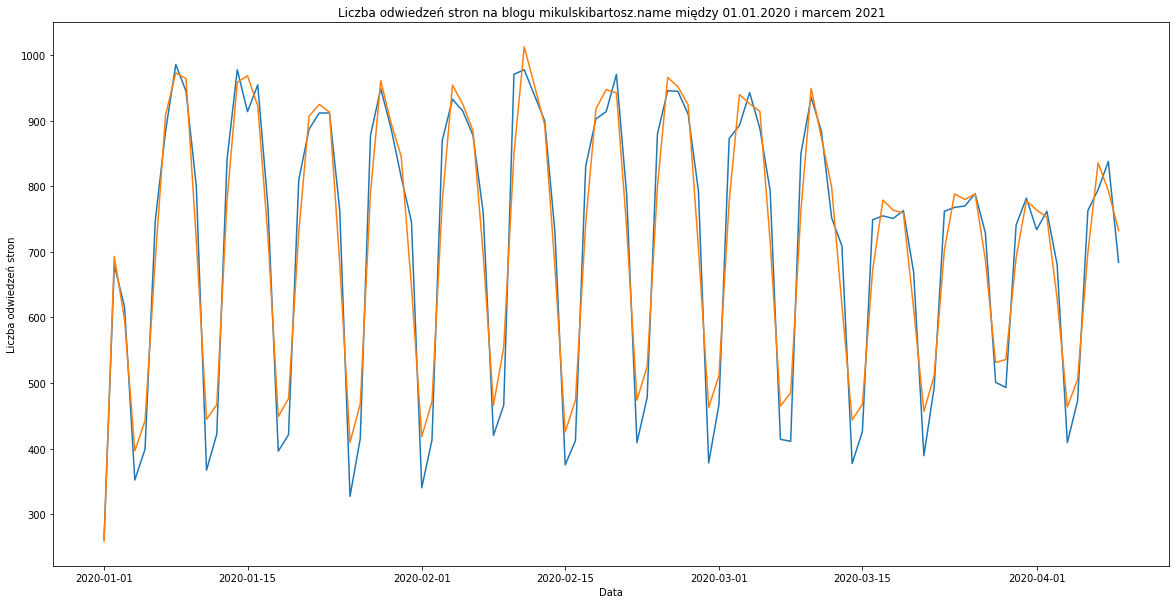

In [96]:
plt.plot(data.date[0:100], data.visitors[0:100])
plt.plot(data.date[0:100], smoothed_2dg[0:100], c='#ff7f0e')

plt.xlabel('Data')
plt.ylabel('Liczba odwiedzeń stron')
plt.title('Liczba odwiedzeń stron na blogu mikulskibartosz.name między 01.01.2020 i marcem 2021')
plt.show()

In [97]:
data['visitors'] = smoothed_2dg

In [98]:
features = data[[
  'visitors',
  'day_of_week_sin',
  'day_of_week_cos',
  'day_of_month_sin',
  'day_of_month_cos',
  'is_weekend'
]]

In [99]:
n = len(features)

train_df = features[0:int(n*0.7)]
val_df = features[int(n*0.7):int(n*0.9)]
test_df = features[int(n*0.9):]

num_features = features.shape[1]

In [100]:
train_mean = train_df.mean() # TRAIN!
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [101]:
window = WindowGenerator(
    input_width=7,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=['visitors']
)

In [102]:
def build_model(hp):
    model = tf.keras.Sequential()
    
    number_of_units = hp.Int('lstm_units_1', min_value=32, max_value=512, step=8)
    dropout = hp.Float('dropout_1', min_value=0.0, max_value=0.6, step=0.1)

    model.add(
        tf.keras.layers.LSTM(number_of_units, return_sequences=True)
    )
    model.add(
        tf.keras.layers.Dropout(dropout)
    )

    number_of_units = hp.Int('lstm_units_last', min_value=32, max_value=512, step=8)
    dropout = hp.Float('dropout_last', min_value=0.0, max_value=0.6, step=0.1)

    model.add(
        tf.keras.layers.LSTM(number_of_units, return_sequences=False)
    )
    model.add(
        tf.keras.layers.Dropout(dropout)
    )

        
    model.add(
        tf.keras.layers.Dense(OUT_STEPS * num_features)
    )
    model.add(
        tf.keras.layers.Reshape([OUT_STEPS, num_features])
    )
    
    model.compile(
        loss=tf.losses.MeanSquaredError(),
        optimizer=tf.optimizers.Adam(),
        metrics=[tf.metrics.MeanAbsoluteError()]
    )
    
    return model

In [105]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=2,
    directory='hyperband_output',
    project_name='RNN_LSTM_7'
)

In [106]:
tuner.search(window.train, validation_data=window.val, epochs=10, callbacks=[early_stopping])

Trial 46 Complete [00h 00m 12s]
val_loss: 0.3583296835422516

Best val_loss So Far: 0.3499041497707367
Total elapsed time: 00h 06m 31s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [107]:
tuner.results_summary()

Results summary
Results in hyperband_output/RNN_LSTM_7
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
lstm_units_1: 184
dropout_1: 0.30000000000000004
lstm_units_last: 272
dropout_last: 0.30000000000000004
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.3499041497707367
Trial summary
Hyperparameters:
lstm_units_1: 96
dropout_1: 0.0
lstm_units_last: 504
dropout_last: 0.6000000000000001
tuner/epochs: 10
tuner/initial_epoch: 5
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: b74d5d802793b093681d4726376720e2
Score: 0.35183534026145935
Trial summary
Hyperparameters:
lstm_units_1: 432
dropout_1: 0.30000000000000004
lstm_units_last: 328
dropout_last: 0.2
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.3583296835422516
Trial summary
Hyperparameters:
lstm_units_1: 112
dropout_1: 0.2
lstm_units_last: 416
dropout_last: 0.5
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tun